In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
%matplotlib inline

In [3]:
from keras.callbacks import Callback
from matplotlib import pyplot as plt
from IPython.display import clear_output
class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('auc'))
        self.val_acc.append(logs.get('val_auc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(15,10))
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="validation_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import telepot
def send_notify(text):
    with open('../../_access_keys/telegram_token.txt', 'r') as content_file:
        token = content_file.read()
    with open('../../_access_keys/user.txt', 'r') as content_file:
        user = content_file.read()
    try:
        TelegramBot = telepot.Bot(token)
        TelegramBot.sendMessage(int(user), text)
    except:
        pass

In [340]:
TRAIN = False

In [341]:
path = 'c:/data/mlbootcamp/dataset/'
path_train = path + 'train/'
path_test = path + 'test/'
path_features = 'features/'
if TRAIN:
    pathfiles = path_train
    path_subs_bs_consumption = 'subs_bs_consumption_train.csv'
    path_subs_bs_data_session = 'subs_bs_data_session_train.csv'
    path_subs_bs_voice_session = 'subs_bs_voice_session_train.csv'
    path_subs_features = 'subs_features_train.csv'
    path_subs_csi = 'subs_csi_train.csv'
    path_new_features = 'features.csv'
else:
    pathfiles = path_test
    path_subs_bs_consumption = 'subs_bs_consumption_test.csv'
    path_subs_bs_data_session = 'subs_bs_data_session_test.csv'
    path_subs_bs_voice_session = 'subs_bs_voice_session_test.csv'
    path_subs_features = 'subs_features_test.csv'
    path_subs_csi = 'subs_csi_test.csv'
    path_new_features = 'features.csv'

In [342]:
subs_csi = pd.read_csv(pathfiles + path_subs_csi, sep=';', decimal=',')

In [343]:
subs_csi.head(1)

,SK_ID,CONTACT_DATE
0,6184,02.04


In [344]:
subs_csi.shape

(5221, 2)

In [345]:
subs_bs_consumption = pd.read_csv(pathfiles + path_subs_bs_consumption, sep=';', decimal=',')

In [346]:
subs_bs_consumption['month'] = subs_bs_consumption['MON'].apply(lambda x:int(str(x).split('.')[1]))

In [347]:
subs_bs_consumption.head(1)

,SK_ID,CELL_LAC_ID,MON,SUM_MINUTES,SUM_DATA_MB,SUM_DATA_MIN,month
0,6357,104453,01.02,0.0,0.0,0.000234,2


In [348]:
subs_bs_consumption.shape

(1179454, 7)

In [349]:
subs_bs_data_session = pd.read_csv(pathfiles + path_subs_bs_data_session, sep=';', decimal=',')

In [350]:
subs_bs_data_session.head(1)

,SK_ID,CELL_LAC_ID,DATA_VOL_MB,START_TIME
0,4992,3442,0.000564,13.03 16:00:00


In [351]:
subs_bs_data_session.shape

(4138720, 4)

In [352]:
subs_features = pd.read_csv(pathfiles + path_subs_features, sep=';', decimal=',')

In [353]:
subs_features.head(1)

,SNAP_DATE,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
0,01.10.01,8,6954,44,12,1,1,12.0,3,NaN,...,1,1,0.014411,0.036439,0.0,0.0,0.040759,0.027579,0.103896,10.0


In [354]:
subs_features.shape

(58989, 36)

In [355]:
subs_features['SNAP_DATE'] = subs_features['SNAP_DATE'].apply(lambda x:datetime.strptime(x, '%d.%m.%y'))

In [356]:
cats = subs_features['COM_CAT#24'].unique()
subs_features['COM_CAT#242'] = pd.Categorical(subs_features['COM_CAT#24'], categories=cats)
subs_features['COM_CAT#242'] = subs_features['COM_CAT#242'].cat.codes

In [357]:
subs_features['COM_CAT#34'].fillna(0, inplace=True)
subs_features['COM_CAT#8'].fillna(0, inplace=True)
subs_features['DEVICE_TYPE_ID'].fillna(0, inplace=True)
subs_features['ARPU_GROUP'].fillna(0, inplace=True)
subs_features['INTERNET_TYPE_ID'].fillna(0, inplace=True)

In [358]:
subs_features.dropna().shape

(58989, 37)

In [359]:
subs_features['month'] = subs_features['SNAP_DATE'].apply(lambda x:x.month)
subs_features['year'] = subs_features['SNAP_DATE'].apply(lambda x:x.year)

In [360]:
columns = ['COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3', 'BASE_TYPE', 'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'COM_CAT#8',
          'DEVICE_TYPE_ID', 'INTERNET_TYPE_ID', 'REVENUE', 'ITC', 'VAS', 'RENT_CHANNEL', 'ROAM',
          'COST', 'COM_CAT#242']
for i in range(18):
    if i + 17 == 24:
        continue
    columns.append('COM_CAT#{}'.format(i+17))

In [361]:
subs_features.head()

,SNAP_DATE,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34,COM_CAT#242,month,year
0,2001-10-01,8,6954,44,12,1,1,12.0,3,0.0,...,0.036439,0.000000,0.000000,0.040759,0.027579,0.103896,10.0,0,10,2001
1,2001-10-01,8,9663,44,5,2,1,8.0,1,952.0,...,0.000493,0.000002,0.000000,0.044780,0.027579,0.103896,10.0,0,10,2001
2,2001-10-01,8,7895,12,5,2,1,7.0,4,1322.0,...,0.001190,0.000000,0.000000,0.032650,0.027579,0.103896,10.0,0,10,2001
3,2001-10-01,8,8913,52,8,2,1,9.0,1,126.0,...,0.009464,0.001677,0.005317,0.062162,0.027579,0.103896,7.0,0,10,2001
4,2001-10-01,8,8876,44,5,2,1,7.0,3,1244.0,...,0.008762,0.000000,0.000000,0.077768,0.027579,0.103896,3.0,0,10,2001


In [362]:
subs_features.describe()

,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,DEVICE_TYPE_ID,...,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34,COM_CAT#242,month,year
count,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,...,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000
mean,4.475614,6909.303023,40.964231,5.274170,1.939362,0.990541,7.503416,2.418400,804.772754,4.587482,...,0.017566,0.004167,0.004383,0.045646,0.028234,0.105025,5.441726,0.000356,6.456882,2001.352896
std,2.187412,1868.652121,22.121673,2.804044,0.238668,0.096799,3.273761,1.655322,547.242582,0.945789,...,0.030751,0.013551,0.020910,0.052554,0.008920,0.011167,3.638862,0.039275,3.483752,0.477875
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.019839,0.093571,0.000000,0.000000,1.000000,2001.000000
25%,3.000000,5692.000000,25.000000,5.000000,2.000000,1.000000,5.000000,1.000000,165.000000,5.000000,...,0.000873,0.000000,0.000000,0.010227,0.027579,0.103896,2.000000,0.000000,3.000000,2001.000000
50%,4.000000,7031.000000,38.000000,5.000000,2.000000,1.000000,7.000000,2.000000,837.000000,5.000000,...,0.006288,0.000039,0.000000,0.029631,0.027579,0.103896,4.000000,0.000000,6.000000,2001.000000
75%,6.000000,8399.000000,60.000000,5.000000,2.000000,1.000000,10.000000,3.000000,1311.000000,5.000000,...,0.021304,0.002761,0.000083,0.062445,0.027579,0.103896,9.000000,0.000000,10.000000,2002.000000
max,8.000000,9748.000000,83.000000,17.000000,2.000000,1.000000,12.000000,9.000000,1702.000000,8.000000,...,1.000000,0.431942,0.954655,0.678783,1.000000,1.000000,10.000000,6.000000,12.000000,2002.000000


In [363]:
if TRAIN:
    factors = {}
for c in columns:
    #emean =  np.mean(subs_features[c])
    if TRAIN:
        emin = np.min(subs_features[c])
    else:
        emin = factors[c][0]
    #subs_features[c] -= emean
    subs_features[c] -= emin
    if TRAIN:
        emax = np.max(subs_features[c])
    else:
        emax = factors[c][1]
    subs_features[c] /= emax
    if TRAIN:
        factors[c] = (emin, emax)

In [364]:
subs_features.describe()

,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,DEVICE_TYPE_ID,...,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34,COM_CAT#242,month,year
count,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,...,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000
mean,0.496516,6909.303023,0.487369,0.267136,0.939362,0.990541,0.625285,0.177300,0.472839,0.573435,...,0.027222,0.004167,0.004383,0.045646,0.050357,0.278068,0.544173,0.000051,6.456882,2001.352896
std,0.312487,1868.652121,0.269777,0.175253,0.238668,0.096799,0.272813,0.206915,0.321529,0.118224,...,0.047655,0.013551,0.020910,0.052554,0.015909,0.029565,0.363886,0.005611,3.483752,0.477875
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.035384,0.247742,0.000000,0.000000,1.000000,2001.000000
25%,0.285714,5692.000000,0.292683,0.250000,1.000000,1.000000,0.416667,0.000000,0.096945,0.625000,...,0.001353,0.000000,0.000000,0.010227,0.049189,0.275078,0.200000,0.000000,3.000000,2001.000000
50%,0.428571,7031.000000,0.451220,0.250000,1.000000,1.000000,0.583333,0.125000,0.491774,0.625000,...,0.009744,0.000039,0.000000,0.029631,0.049189,0.275078,0.400000,0.000000,6.000000,2001.000000
75%,0.714286,8399.000000,0.719512,0.250000,1.000000,1.000000,0.833333,0.250000,0.770270,0.625000,...,0.033014,0.002761,0.000083,0.062445,0.049189,0.275078,0.900000,0.000000,10.000000,2002.000000
max,1.000000,9748.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.549681,0.431942,0.954655,0.678783,1.783568,2.647632,1.000000,0.857143,12.000000,2002.000000


In [365]:
subs_features[columns].describe()

,COM_CAT#1,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,DEVICE_TYPE_ID,INTERNET_TYPE_ID,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
count,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,...,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000,58989.000000
mean,0.496516,0.487369,0.267136,0.939362,0.990541,0.625285,0.177300,0.472839,0.573435,0.635531,...,0.999898,0.989049,0.016375,0.027222,0.004167,0.004383,0.045646,0.050357,0.278068,0.544173
std,0.312487,0.269777,0.175253,0.238668,0.096799,0.272813,0.206915,0.321529,0.118224,0.246137,...,0.010085,0.104074,0.024331,0.047655,0.013551,0.020910,0.052554,0.015909,0.029565,0.363886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035384,0.247742,0.000000
25%,0.285714,0.292683,0.250000,1.000000,1.000000,0.416667,0.000000,0.096945,0.625000,0.333333,...,1.000000,1.000000,0.001940,0.001353,0.000000,0.000000,0.010227,0.049189,0.275078,0.200000
50%,0.428571,0.451220,0.250000,1.000000,1.000000,0.583333,0.125000,0.491774,0.625000,0.666667,...,1.000000,1.000000,0.007878,0.009744,0.000039,0.000000,0.029631,0.049189,0.275078,0.400000
75%,0.714286,0.719512,0.250000,1.000000,1.000000,0.833333,0.250000,0.770270,0.625000,0.666667,...,1.000000,1.000000,0.020910,0.033014,0.002761,0.000083,0.062445,0.049189,0.275078,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.727991,1.549681,0.431942,0.954655,0.678783,1.783568,2.647632,1.000000


In [366]:
def get_subs_features(year, month, fix_month, day, sk_id):
    data = subs_features[(subs_features['year'] == year) & (subs_features['month'] == month) & (subs_features['SK_ID'] == sk_id)]
    columns = ['COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3', 'BASE_TYPE', 'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'COM_CAT#8',
              'DEVICE_TYPE_ID', 'INTERNET_TYPE_ID', 'REVENUE', 'ITC', 'VAS', 'RENT_CHANNEL', 'ROAM',
              'COST', 'COM_CAT#242']
    for i in range(18):
        if i + 17 == 24:
            if data.shape[0] == 1:
                d = data[['COM_CAT#24']].values[0].tolist()[0]
                dt = str(d).split('.')
                c_month = int(dt[1])
                c_day = int(dt[0])
                delta = (datetime(2002, fix_month, day) - datetime(2001 if d == '31.12' else 2002, c_month, c_day)).days
            continue
        columns.append('COM_CAT#{}'.format(i+17))
    if data.shape[0] == 1:
        return columns, data[columns].values[0].tolist()
    else:
        return columns, np.zeros(len(columns))

In [367]:
# for dnn
table = []
if TRAIN:
    y = np.zeros(subs_csi.shape[0])
for i in enumerate(subs_csi.values):
    sk_id = int(i[1][0])
    #line = [sk_id]
    #table_columns = ['sk_id']
    if TRAIN:
        dt = str(i[1][2]).split('.')
    else:
        dt = str(i[1][1]).split('.')
    year = 2002
    month = int(dt[1])
    row = []
    for j in range(12):
        new_line = get_subs_features(year, month, int(dt[1]), int(dt[0]), sk_id)
        #line.extend(new_line[1])
        row.append(new_line[1])
        #table_columns.extend(new_line[0])
        month -= 1
        if month == 0:
            month = 12
            year -= 1
    table.append(row)
    if TRAIN:
        y[i[0]] = i[1][1]

In [368]:
data = np.array(table)

In [369]:
data.shape

(5221, 12, 34)

In [370]:
np.max(data)

7.695618564670232

In [371]:
columns_avg = ['CELL_AVAILABILITY_2G', 'CELL_AVAILABILITY_3G',
       'CELL_AVAILABILITY_4G', 'CSSR_2G', 'CSSR_3G',
       'ERAB_PS_BLOCKING_RATE_LTE', 'ERAB_PS_BLOCKING_RATE_PLMN_LTE',
       'ERAB_PS_DROP_RATE_LTE', 'HSPDSCH_CODE_UTIL_3G',
       'NODEB_CNBAP_LOAD_HARDWARE', 'PART_CQI_QPSK_LTE', 'PART_MCS_QPSK_LTE',
       'PROC_LOAD_3G', 'PSSR_2G', 'PSSR_3G', 'PSSR_LTE',
       'RAB_CS_BLOCKING_RATE_3G', 'RAB_CS_DROP_RATE_3G',
       'RAB_PS_BLOCKING_RATE_3G', 'RAB_PS_DROP_RATE_3G', 'RBU_AVAIL_DL',
       'RBU_AVAIL_DL_LTE', 'RBU_AVAIL_UL', 'RBU_OTHER_DL', 'RBU_OTHER_UL',
       'RBU_OWN_DL', 'RBU_OWN_UL', 'RRC_BLOCKING_RATE_3G',
       'RRC_BLOCKING_RATE_LTE', 'RTWP_3G', 'SHO_FACTOR', 'TBF_DROP_RATE_2G',
       'TCH_DROP_RATE_2G', 'UTIL_BRD_CPU_3G', 'UTIL_CE_DL_3G',
       'UTIL_CE_HW_DL_3G', 'UTIL_CE_UL_3G', 'UTIL_SUBUNITS_3G',
       'UL_VOLUME_LTE', 'DL_VOLUME_LTE', 'TOTAL_DL_VOLUME_3G',
       'TOTAL_UL_VOLUME_3G']

In [372]:
columns_chhn = ['AVEUSERNUMBER', 'AVEUSERNUMBER_PLMN',
       'AVR_DL_HSPA_USER_3G', 'AVR_DL_R99_USER_3G', 'AVR_DL_USER_3G',
       'AVR_DL_USER_LTE', 'AVR_TX_POWER_3G', 'AVR_UL_HSPA_USER',
       'AVR_UL_R99_USER', 'AVR_UL_USER_3G', 'AVR_UL_USER_LTE',
       'DL_AVR_THROUGHPUT_3G', 'DL_AVR_THROUGHPUT_LTE',
       'DL_AVR_THROUGHPUT_R99', 'DL_MEAN_USER_THROUGHPUT_LTE',
       'DL_MEAN_USER_THROUGHPUT_DL_2G', 'DL_MEAN_USER_THROUGHPUT_HSPA3G',
       'DL_MEAN_USER_THROUGHPUT_PLTE', 'DL_MEAN_USER_THROUGHPUT_REL93G',
       'HSDPA_USERS_3G', 'HSUPA_USERS_3G', 'RBU_USED_DL', 'RBU_USED_UL',
       'RELATIVE_RBU_USED_DL', 'RELATIVE_RBU_USED_UL', 'RELATIVE_TX_POWER_3G',
       'UL_AVR_THROUGHPUT_3G', 'UL_AVR_THROUGHPUT_LTE',
       'UL_AVR_THROUGHPUT_R99', 'UL_MEAN_USER_THROUGHPUT_LTE',
       'UL_MEAN_USER_THROUGHPUT_HS3G', 'UL_MEAN_USER_THROUGHPUT_PLTE',
       'UL_MEAN_USER_THROUGHPUT_REL93G']

In [373]:
def get_columns(count, postfix):
    return ['{} {}'.format(i, postfix) for i in range(count)]       

In [374]:
if TRAIN:
    scalers = {}

In [375]:
def get_extend_data(type_data, column_name, count, postfix):
    fname = pathfiles + path_features + '{}_{}.csv'.format(type_data, column_name)
    result = pd.read_csv(fname)
    table = []
    result = result[get_columns(count, postfix)]
    result.fillna(np.nanmean(result), inplace=True)
    for i in result.values:
        table.append(np.array(i).reshape((count, 1)))
    res_table = np.array(table)
    
    if TRAIN:
        scale_mean = np.min(res_table)
        res_table -= scale_mean
        scale_std = np.max(res_table)
        if scale_std != 0:
            res_table /= scale_std
        scalers[(type_data, column_name, count, postfix)] = (scale_mean, scale_std)
    else:
        scale_mean = scalers[(type_data, column_name, count, postfix)][0]
        scale_std = scalers[(type_data, column_name, count, postfix)][1]
        res_table -= scale_mean
        if scale_std != 0:
            res_table /= scale_std
    return res_table

def get_all_data():
    result = None
    count_days = 45
    for columns in [columns_avg, columns_chhn]:
        for c in columns:
            for type_data in ['data', 'voice']:
                if result is None:
                    result = np.concatenate([get_extend_data('data', c, count_days, 'sum'), get_extend_data('data', c, count_days, 'count')], axis=2)
                    t = get_extend_data('voice', c, count_days, 'sum')
                    result = np.concatenate([result, t], axis=2)
                    t = get_extend_data('voice', c, count_days, 'count')
                    result = np.concatenate([result, t], axis=2)
                for a in ['min', 'avg', 'max', 'mina', 'avga', 'maxa']:
                    t = get_extend_data(type_data, c, count_days, a)
                    result = np.concatenate([result, t], axis=2)
    return result

In [376]:
data2 = get_all_data()

In [377]:
data2.shape

(5221, 45, 904)

In [378]:
#(4222, 45, 902)

In [379]:
np.max(data2)

59.75000000000001

In [380]:
np.min(data2)

0.0

In [381]:
if not TRAIN:
    X3 = np.asarray(data)
    X4 = np.asarray(data2)
    X3 = np.array(X3.tolist())
    X4 = np.array(X4.tolist())
    X3 = np.asarray(data)

In [235]:
X1 = np.asarray(data)
X2 = np.asarray(data2)
y = np.asarray(y)

In [236]:
print(X1.shape)
print(X2.shape)

(4222, 12, 34)
(4222, 45, 904)


In [237]:
X1 = np.array(X1.tolist())
X2 = np.array(X2.tolist())

In [238]:
print(X1.shape)
print(X2.shape)

(4222, 12, 34)
(4222, 45, 904)


In [239]:
X1 = np.asarray(data)
y = np.asarray(y)

In [240]:
from sklearn.model_selection import train_test_split

In [250]:
X_train_1, X_test_1, X_train_2, X_test_2, y_train, y_test = train_test_split(X1, X2, y, test_size=0.2, random_state=4233)

In [251]:
from sklearn.utils.class_weight import compute_class_weight


In [252]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Input, GlobalMaxPooling1D, GRU, Bidirectional, LSTM
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [253]:
from sklearn.metrics import roc_auc_score
from keras import regularizers, Input, layers

In [254]:
from sklearn import metrics
from keras import backend as K
import tensorflow as tf
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [478]:
def create_model():
    #build Keras model
    
    cnn_input = Input(shape=X_test_2.shape[1:], dtype='float32')
    #x_0 = LSTM(256, dropout=0.2, recurrent_dropout=0.2)(cnn_input)
    #x_0 = Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2))(x_0)
   
    x_0 = Conv1D(256, 3, activation='relu')(cnn_input)
    x_0 = MaxPooling1D(3)(x_0)
    x_0 = Conv1D(256, 3, activation='relu')(x_0)
    x_0 = GlobalMaxPooling1D()(x_0)
    #x_0 = Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2))(x_0)
    
    
    #x_0 = GRU(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(0.005))(cnn_input)
    #x_0 = GRU(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x_0)
    #x_0 = GRU(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x_0)
    #x_0 = GRU(64, dropout=0.3, recurrent_dropout=0.3, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x_0)

    for i in range(8):
        x_0 = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x_0)
        #x_0 = Dropout(0.3)(x_0)
    x_0 = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x_0)

    
    
    
    dnn_input = Input(shape=X_test_1.shape[1:], dtype='float32')
    x_1 = Conv1D(256, 3, activation='relu')(dnn_input)
    x_1 = MaxPooling1D(3)(x_1)
    x_1 = Conv1D(256, 3, activation='relu')(x_1)
    x_1 = GlobalMaxPooling1D()(x_1)

    #x_1 = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(dnn_input)
    #x_1 = Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2))(x_1)
    
    #x_1 = GRU(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(0.001))(dnn_input)
    #x_1 = GRU(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x_1)
    #x_1 = GRU(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x_1)
    #x_1 = GRU(64, dropout=0.3, recurrent_dropout=0.3, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x_1)

    for i in range(8):
        x_1 = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x_1)
        #x_1 = Dropout(0.3)(x_1)
    x_1 = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x_1)
    
    concatenated = layers.concatenate([x_0, x_1], axis=-1)
    
    preds = Dense(1, activation='sigmoid')(concatenated)
        
    model = Model([cnn_input, dnn_input], preds)
        
    model.compile(loss='binary_crossentropy', metrics=[auc], optimizer='adam')
    return model

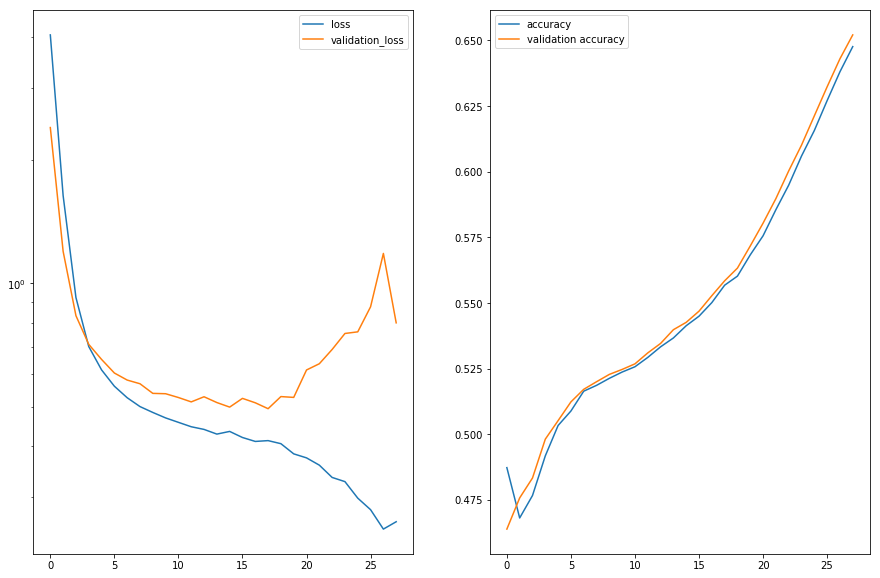

2701/2701 [==============================] - 20s 7ms/step - loss: 0.2617 - auc: 0.6477 - val_loss: 0.8011 - val_auc: 0.6521


In [479]:
count_epochs = 600
class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)
model = create_model()
early_stopping_monitor = EarlyStopping(patience=10)
history = model.fit([np.array(X_train_2), np.array(X_train_1)], np.array(y_train), batch_size = 64, epochs = count_epochs, verbose=1, validation_split=0.2, class_weight=class_weights, callbacks=[plot,early_stopping_monitor])

In [480]:
predict = model.predict([np.array(X_test_2), np.array(X_test_1)])
score = roc_auc_score(y_test, predict)
text = "Total roc auc score = {0:0.4f}".format(score)
print(text)

Total roc auc score = 0.5099


In [473]:
send_notify(text)

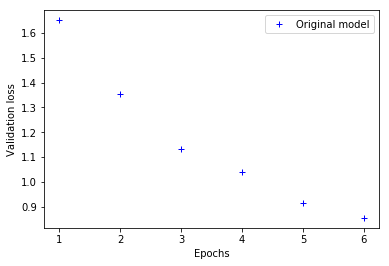

In [79]:
history_gr = history.history['val_loss']
import matplotlib.pyplot as plt
epochs = range(1, len(history_gr) + 1)
plt.plot(epochs, history_gr, 'b+', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [141]:
model_json = model.to_json()
# Записываем модель в файл
json_file = open("output/sale_model3.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("output/sale_model3.h5")

In [382]:
def save_predict(predict):
    with open('output/second.csv', 'w') as f:
        for item in predict:
            f.write("%s\n" % item[0])

In [383]:
save_predict(model.predict([np.array(X4), np.array(X3)]))